In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
df=pd.read_csv("C:\\Users\\archy\\OneDrive\\Documents\\TSF-GRIP\\task__1.csv")

**By using the above data we will predict the percentage of the student depending on hours spent on their studies.**

**Code written and presented by ARCHANA DIXIT**

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<AxesSubplot:>

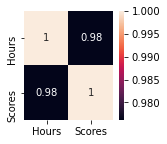

In [7]:
df.corr()
plt.figure(figsize = (2,2))
sns.heatmap(df.corr(),annot = True)

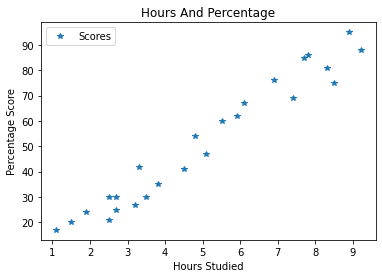

In [8]:
df.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours And Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

** From the above both the plot we can see that there is positive correlation and linear realtion between the both variables.


In [9]:
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values  

In [10]:
#X=df.drop('MEDV',axis = 1)
#y=df.pop('MEDV')

In [11]:
from sklearn.model_selection import train_test_split  


In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30, random_state =0)

In [13]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

In [14]:
#getting the score on training set
print('The coefficient of determination R^2 of the prediction on Train set',regression_model.score(X_train, Y_train))


The coefficient of determination R^2 of the prediction on Train set 0.9484997422695115


In [15]:
#getting the score on testing set
print('The coefficient of determination R^2 of the prediction on Test set',regression_model.score(X_test, Y_test))


The coefficient of determination R^2 of the prediction on Test set 0.9568211104435257


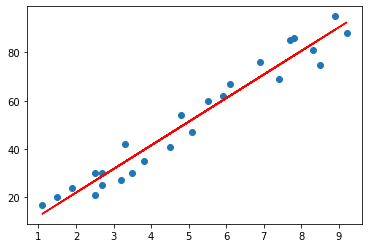

In [16]:
line = regression_model.coef_*X+regression_model.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line, color="r");
plt.show()

In [17]:
print(X_test) 
ypred = regression_model.predict(X_test) 



[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [18]:
ypred = regression_model.predict(X_test)
print(ypred)

[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


**Above is the predicted score on test dataset.**

In [19]:
df_1 = pd.DataFrame({'Actual': Y_test, 'Predicted': ypred})  
df_1 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


**Above is the actual score VS predicted score on the testdata set**

In [20]:
hours = np.array([9.25])
hours = hours.reshape(-1,1)
own_pred = regression_model.predict(hours)
print("No of Hours = {}".format(float(hours)))
print("Predicted Score = {}".format(round(own_pred[0],2)))

No of Hours = 9.25
Predicted Score = 92.92


In [21]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, ypred)) 

Mean Absolute Error: 4.419727808027652


In [22]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(Y_test,regression_model.predict(X_test))))

The Root Mean Square Error (RMSE) of the model is for testing set is 4.792191274636315


**We can check the perfomance of the algorithm on the dataset by calculating "mean absolute error" and "Root mean square error"**